In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [6]:
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("titanic.csv")

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.shape

(891, 12)

### 1. The problem is Classification Based Problem

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2. Identify What all features to use for Modelling

In [11]:
df['PassengerId'].nunique()

891

In [ ]:
## PassengerId, Name , Cabin , Ticket 

In [12]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [13]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

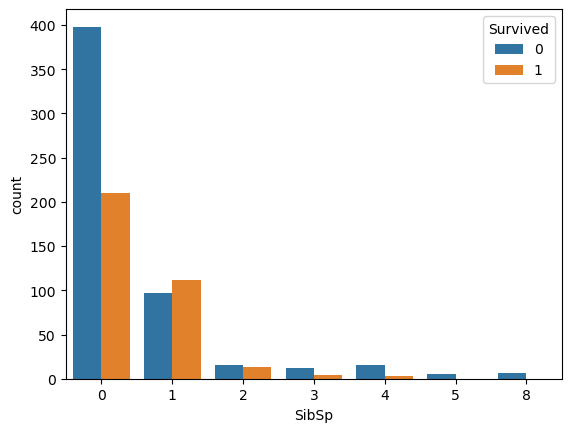

In [15]:
sns.countplot(x=df['SibSp'], hue=df['Survived'])

<Axes: xlabel='Parch', ylabel='count'>

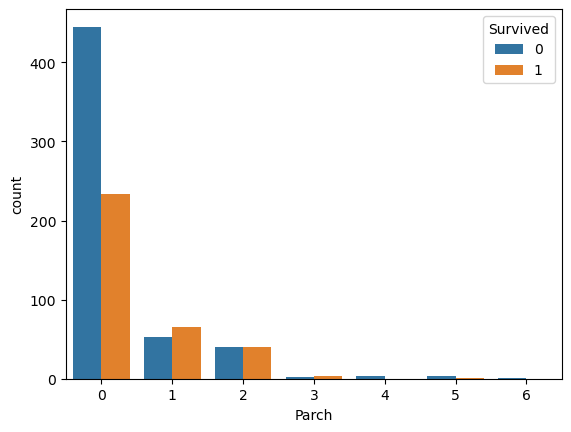

In [17]:
sns.countplot(x=df['Parch'], hue=df['Survived'])

In [18]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [19]:
df['Ticket'].nunique()

681

<Axes: xlabel='Embarked', ylabel='count'>

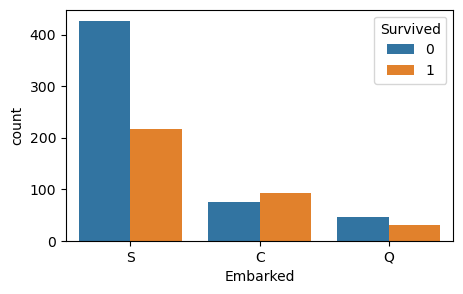

In [23]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['Embarked'], hue=df['Survived'])

### 3. Removing Features which are not required

In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
##df = df.drop(['PassengerId', 'Ticket',  'Name'],axis=1)

In [28]:
df.drop(['PassengerId', 'Ticket',  'Name'],axis=1, inplace=True)

In [33]:
df.drop(['Cabin'],axis=1, inplace=True)

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Treating Null Values 

In [31]:
round(df['Age'].mean(),2)

29.7

In [35]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [36]:
df['Age'] = df['Age'].fillna(round(df['Age'].mean(),2))

In [37]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [38]:
df.dropna(inplace=True)

In [39]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Convert Categorical Variable to Numerical Value 
1. Using Apply method (Class Mapping)
2. Using Label Encoding Method
3. One Hot Encoding 


In [57]:
df1 = df

In [58]:
df1['Sex'].value_counts()

0    577
1    312
Name: Sex, dtype: int64

In [55]:
gender_mapping = {'male': 0 , 'female':1}

In [60]:
#df1['Sex'] = df1['Sex'].apply(lambda x: gender_mapping[x])

In [ ]:
df1.head()

In [48]:
df1['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [50]:
# Arrangement = 'C'. 'Q', 'S'
                 0,   1,  2
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

In [51]:
df1['Embarked'] = le.fit_transform(df1['Embarked'])

In [52]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


# One Hot Encoding 
C, S, Q

Embarked_C , Embarked_S , Embarked_Q
0          , 1         , 0 


from sklearn.preprocessing import OneHotEncoder

### Finding Correlation [-1, 1]      0 = No correlation 1= Very High +ve Corr  -1 Very High -ve Corr

If Corr  < -0.7   or Corr>0.7  We can remove 1 of 2 features 

In [61]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,0.541585,-0.074675,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,-0.127741,-0.327949,0.081656,0.016824,-0.548193,0.164681
Sex,0.541585,-0.127741,1.000000,-0.089435,0.116348,0.247508,0.179958,-0.110320
Age,-0.074675,-0.327949,-0.089435,1.000000,-0.231875,-0.178235,0.088602,-0.028931
SibSp,-0.034040,0.081656,0.116348,-0.231875,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,0.247508,-0.178235,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,0.179958,0.088602,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,-0.110320,-0.028931,0.068900,0.040449,-0.226311,1.000000


<Axes: >

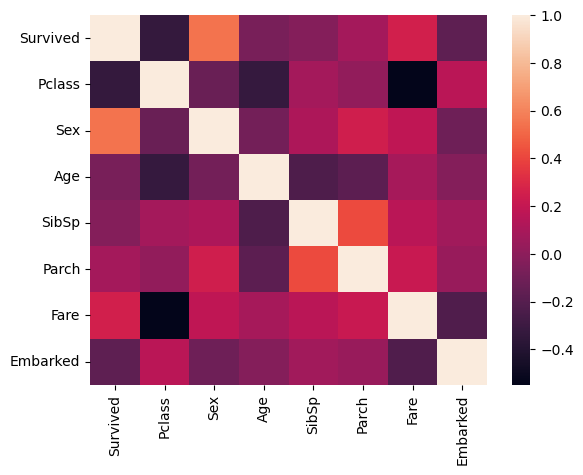

In [62]:
sns.heatmap(df.corr())

## EDA

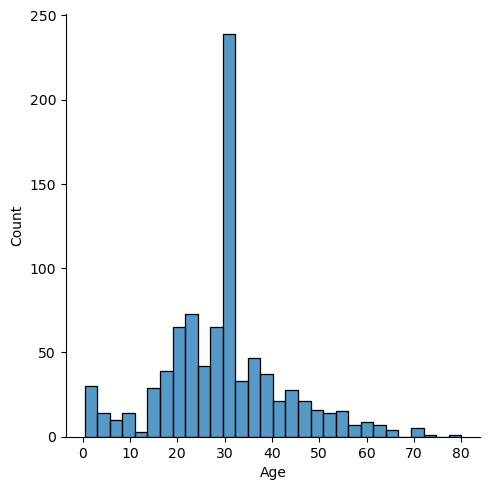

In [63]:
sns.displot(df['Age'])

<Axes: xlabel='Age', ylabel='Density'>

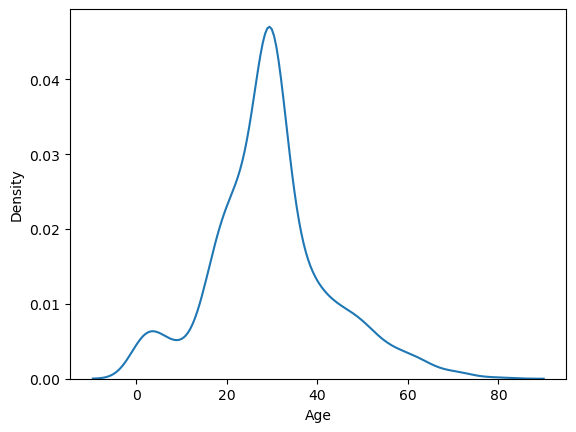

In [64]:
sns.kdeplot(df['Age'])

In [68]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [70]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [76]:
# X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']]
X = df.iloc[:, 1:]
Y = df['Survived']

In [77]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,2
1,1,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.9250,2
3,1,1,35.0,1,0,53.1000,2
4,3,0,35.0,0,0,8.0500,2


In [73]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [69]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# z-score = x-mean_x/ SD_x

In [78]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [80]:
X 

array([[ 0.82520863, -0.73534203, -0.59050845, ..., -0.47432585,
        -0.50023975,  0.58683958],
       [-1.57221121,  1.35991138,  0.64395742, ..., -0.47432585,
         0.78894661, -1.93955453],
       [ 0.82520863,  1.35991138, -0.28189198, ..., -0.47432585,
        -0.48664993,  0.58683958],
       ...,
       [ 0.82520863,  1.35991138,  0.00357825, ...,  2.00611934,
        -0.17408416,  0.58683958],
       [-1.57221121, -0.73534203, -0.28189198, ..., -0.47432585,
        -0.0422126 , -1.93955453],
       [ 0.82520863, -0.73534203,  0.18103272, ..., -0.47432585,
        -0.49017322, -0.67635748]])

In [81]:
X = pd.DataFrame(X, columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked'] )

In [82]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.825209,-0.735342,-0.590508,0.431350,-0.474326,-0.500240,0.586840
1,-1.572211,1.359911,0.643957,0.431350,-0.474326,0.788947,-1.939555
2,0.825209,1.359911,-0.281892,-0.475199,-0.474326,-0.486650,0.586840
3,-1.572211,1.359911,0.412495,0.431350,-0.474326,0.422861,0.586840
4,0.825209,-0.735342,0.412495,-0.475199,-0.474326,-0.484133,0.586840


## Outlier Detection using Box Plot 

<Axes: >

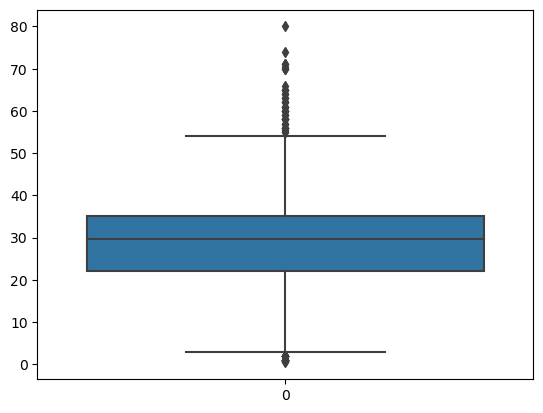

In [88]:
sns.boxplot(df['Age'])

In [91]:
df[df['Age']<10]['Age'].unique()

array([2.  , 4.  , 8.  , 3.  , 7.  , 5.  , 0.83, 9.  , 1.  , 0.92, 0.75,
       6.  , 0.67, 0.42])

<Axes: >

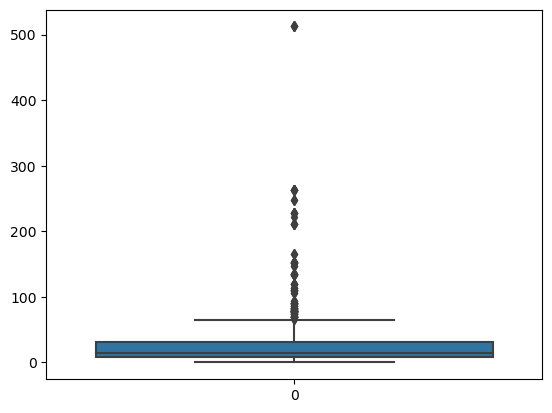

In [92]:
sns.boxplot(df[df['Fare']<400])

<Axes: >

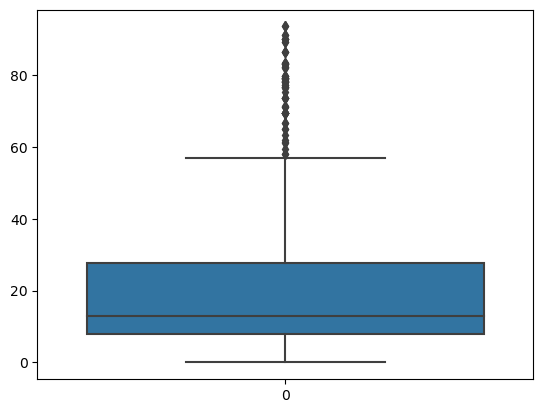

In [95]:
sns.boxplot(df[df['Fare']<100]['Fare'])

## Split the data into train and Test SEt

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y , test_size=0.20, random_state=90)

In [85]:
X.shape

(889, 7)

In [86]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((711, 7), (178, 7), (711,), (178,))

In [87]:
711+178

889

## Apply logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [98]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [105]:
lr.coef_

array([[-0.90972089,  1.32020882, -0.48978534, -0.32158521, -0.01868404,
         0.04971534, -0.19329352]])

In [106]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [99]:
# predict the values 

y_pred = lr.predict(xtest)

In [100]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0], dtype=int64)

In [101]:
accuracy_score(ytest, y_pred)

0.7865168539325843

In [103]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       114
           1       0.72      0.67      0.69        64

    accuracy                           0.79       178
   macro avg       0.77      0.76      0.76       178
weighted avg       0.78      0.79      0.78       178



In [104]:
precision_score(ytest, y_pred)

0.7166666666666667